In [147]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/biker-shade-2023-2024/202307-divvy-tripdata.csv
/kaggle/input/biker-shade-2023-2024/202410-divvy-tripdata.csv
/kaggle/input/biker-shade-2023-2024/202308-divvy-tripdata.csv
/kaggle/input/biker-shade-2023-2024/202401-divvy-tripdata.csv
/kaggle/input/biker-shade-2023-2024/202407-divvy-tripdata.csv
/kaggle/input/biker-shade-2023-2024/202408-divvy-tripdata.csv
/kaggle/input/biker-shade-2023-2024/202409-divvy-tripdata.csv
/kaggle/input/biker-shade-2023-2024/202306-divvy-tripdata.csv
/kaggle/input/biker-shade-2023-2024/202411-divvy-tripdata.csv
/kaggle/input/biker-shade-2023-2024/202309-divvy-tripdata.csv
/kaggle/input/biker-shade-2023-2024/202405-divvy-tripdata.csv
/kaggle/input/biker-shade-2023-2024/202406-divvy-tripdata.csv
/kaggle/input/biker-shade-2023-2024/202305-divvy-tripdata.csv
/kaggle/input/biker-shade-2023-2024/202301-divvy-tripdata.csv
/kaggle/input/biker-shade-2023-2024/202311-divvy-tripdata.csv
/kaggle/input/biker-shade-2023-2024/202404-divvy-tripdata.csv
/kaggle/

In [148]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [149]:
def reduce_size(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    print("Initial memory usage is ",start_mem," Mb")
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

<h1 style="color:blue;">ASK</h1>

<div style="background-color:#fcffc2; padding: 20px;">
    <h2>Context:</h2>
    In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown
to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations
across Chicago. The bikes can be unlocked from one station and returned to any other station
in the system anytime.
     Cyclistic’s marketing strategy relied on building general awareness and appealing to
broad consumer segments. One approach that helped make these things possible was the
exibility of its pricing plans: single-ride passes, full-day passes, and annual memberships.
Customers who purchase single-ride or full-day passes are referred to as casual riders.
Customers who purchase annual memberships are Cyclistic members.
Cyclistic’s finance analysts have concluded that annual members are much more protable
than casual riders. 
Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into
annual members. In order to do that, however, the team needs to beer understand how
annual members and casual riders differ, why casual riders would buy a membership, and how
digital media could aect their marketing tactics. Moreno and her team are interested in
analyzing the Cyclistic historical bike trip data to identify trends.

<h2>Business task:</h2>
To identify how do annual members and casual riders use Cyclistic bikes differently?
<h2>Consider key stakeholders </h2>
<ul>
<li><strong>Lily Moreno</strong>: The director of marketing who is responsible for developing campaigns and initiatives to promote the bike-sharing program.</li>
    <li><strong>Cyclistic marketing analytics team</strong>: This team is responsible for collecting, analyzing, and reporting data that guides Cyclistic's marketing strategy.</li>
    <li><strong>Cyclistic's executive team</strong>: This detail-oriented executive team will decide whether to approve the recommended marketing program.</li>
</ul>

<h2>Key questions:</h2>
<ul>
    <li>How do annual members and casual riders use Cyclistic bikes differently?</li>
</ul>

</div>


<h1 style="color:blue;">PREPARE</h1>
                                   
<div style="background-color:#fcffc2; padding: 20px;">
    <h4>1 - Import of  the dataset from 2023 January to 2024 November</h4>
    <h4>2 - Merge</h4>
    <h4>3 - Organization of the data, preparation...</h4>
</div>

<h2>Importation and merge </h2>

<h3>Importation</h3>

In [150]:
df1 = pd.read_csv('/kaggle/input/biker-shade-2023-2024/202301-divvy-tripdata.csv')
df2 = pd.read_csv('/kaggle/input/biker-shade-2023-2024/202302-divvy-tripdata.csv')
df3 = pd.read_csv('/kaggle/input/biker-shade-2023-2024/202303-divvy-tripdata.csv')
df4 = pd.read_csv('/kaggle/input/biker-shade-2023-2024/202304-divvy-tripdata.csv')
df5 = pd.read_csv('/kaggle/input/biker-shade-2023-2024/202305-divvy-tripdata.csv')
df6 = pd.read_csv('/kaggle/input/biker-shade-2023-2024/202306-divvy-tripdata.csv')
df7 = pd.read_csv('/kaggle/input/biker-shade-2023-2024/202307-divvy-tripdata.csv')
df8 = pd.read_csv('/kaggle/input/biker-shade-2023-2024/202308-divvy-tripdata.csv')
df9 = pd.read_csv('/kaggle/input/biker-shade-2023-2024/202309-divvy-tripdata.csv')
df10 = pd.read_csv('/kaggle/input/biker-shade-2023-2024/202310-divvy-tripdata.csv')
df11 = pd.read_csv('/kaggle/input/biker-shade-2023-2024/202311-divvy-tripdata.csv')
df12 = pd.read_csv('/kaggle/input/biker-shade-2023-2024/202312-divvy-tripdata.csv')
df13 = pd.read_csv('/kaggle/input/biker-shade-2023-2024/202401-divvy-tripdata.csv')
df14 = pd.read_csv('/kaggle/input/biker-shade-2023-2024/202402-divvy-tripdata.csv')
df15 = pd.read_csv('/kaggle/input/biker-shade-2023-2024/202403-divvy-tripdata.csv')
df16 = pd.read_csv('/kaggle/input/biker-shade-2023-2024/202404-divvy-tripdata.csv')
df17 = pd.read_csv('/kaggle/input/biker-shade-2023-2024/202405-divvy-tripdata.csv')
df18 = pd.read_csv('/kaggle/input/biker-shade-2023-2024/202406-divvy-tripdata.csv')
df19 = pd.read_csv('/kaggle/input/biker-shade-2023-2024/202407-divvy-tripdata.csv')
df20 = pd.read_csv('/kaggle/input/biker-shade-2023-2024/202408-divvy-tripdata.csv')
df21 = pd.read_csv('/kaggle/input/biker-shade-2023-2024/202409-divvy-tripdata.csv')
df22 = pd.read_csv('/kaggle/input/biker-shade-2023-2024/202410-divvy-tripdata.csv')
df23 = pd.read_csv('/kaggle/input/biker-shade-2023-2024/202411-divvy-tripdata.csv')

**Let's chech if some dataset have different columns names than others**

In [151]:
columns =  ['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']

df_list = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23]

In [152]:
print('Let s check if the dataset imported have this same type of columns:', columns)

for i, df in enumerate(df_list):
    if  list(df.columns) != columns:
        print('The ',i,'th  have a set of different columns')

Let s check if the dataset imported have this same type of columns: ['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']


**All columns have the same column name so we can concatenate them**

<h3>Merge the columnns</h3>

In [153]:
df = pd.concat([df1, df2, df3, df4,df5, df6, df7,df8,df9,df10,df11,df12,df13, df14, df15, df16, df17, df18, df19,df20, df21, df22, df23], ignore_index=True)
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11402068,6F18BF26B4BFBA75,electric_bike,2024-11-21 08:06:58.538,2024-11-21 08:12:14.548,Desplaines St & Kinzie St,TA1306000003,LaSalle St & Washington St,13006,41.888716,-87.644448,41.882664,-87.632530,member
11402069,4FC0C36143D89998,electric_bike,2024-11-09 14:51:37.776,2024-11-09 14:55:36.959,Desplaines St & Kinzie St,TA1306000003,LaSalle St & Washington St,13006,41.888716,-87.644448,41.882664,-87.632530,member
11402070,8E244ADE5B1653D4,electric_bike,2024-11-23 16:02:26.958,2024-11-23 16:05:25.961,Desplaines St & Kinzie St,TA1306000003,Morgan St & Lake St*,chargingstx4,41.888716,-87.644448,41.885492,-87.652289,member
11402071,65F9D9F5648FAC03,electric_bike,2024-11-05 13:30:34.901,2024-11-05 13:40:07.211,Desplaines St & Kinzie St,TA1306000003,LaSalle St & Washington St,13006,41.888716,-87.644448,41.882664,-87.632530,member


In [154]:
df = reduce_size(df)

Initial memory usage is  1130.8819961547852  Mb
Mem. usage decreased to 869.91 Mb (23.1% reduction)


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11402073 entries, 0 to 11402072
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float16
 9   start_lng           float16
 10  end_lat             float16
 11  end_lng             float16
 12  member_casual       object 
dtypes: float16(4), object(9)
memory usage: 869.9+ MB


<div style="background-color:#fcffc2; padding: 20px;">
<h2>Localization</h2>
The data has been made available by Motivate International Inc. 'ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual'
<h2>Organization</h2>
    The format of each dataset in in csv. Each dataset is a record of each trip in a month. Its columns are:
    <ul>
        <li>Ride_id: determines the id of ech trip </li>
        <li>Rideable_type: the type of bike used</li>
        <li>Started_at and ended_at: determines the start and end of the trip</li>
        <li>Start_station_name, start_station_id, end_station_name, end_station_id: determines the station departure and arrival and their corresponding ids</li>
        <li>Start_lat, start_lng, end_lat, end_lng:   determines the station departure and  arrival latitude and longitude</li>
        <li>Member casual: determines the type of user </li>
    </ul>
    <h2> Licensing, privacy, security, and accessibility</h2>
    The data has been provided under a specific license, which permits its use for analysis but prohibits sharing the data as a standalone dataset. Privacy is preserved as no personally identifiable information is included in the data. Security will involve storing the downloaded data in a secure location, perhaps encrypted if needed. Accessibility refers to ensuring that the data and the subsequent analysis are available to all stakeholders involved in the project. 
<h2>Credibility of the data. Does the data ROCC? </h2>
    <ol>
        <li>Reliable: <BR>
            The dataset is reliable if it is complete(has all the needed parts) , accurate(correct: it has what is needed ) and unbiased 

=>So from my point view, the collected columns are all needed, relevant  because they could help in knowing the difference: 
- rideid and time(started_at and ended_at)  are essential in differencing the count of trips taken for the two usertype in each day (start_weekday)
- station could be used to know which station is most used for a specific usertype : useful to target  people in a station where   subscriber user is most used 
- latitude and longitude to better visualize the distribution of the user types around the station
  </li> 
However some  information could be useful too like   profession to know if such profession is considered more as  customer or subscriber;
        
<li>Originality</li>
It comes from  Motivate International Inc
        
<li>Comprehensive<br>
They contain all critical information needed as explained in the reliable part</li>
<li>Currency: <br>
The data is up-to-date</li>
    </ol>
    <h2>Data's integrity</h2>
    The data's integrity will be verified by performing exploratory data analysis (EDA) in the process steps.
</div>

<h1 style="color:blue;">PROCESS</h1>

**In this step, we are going to  check the data integrity: the data type, data range,the mandatory, the uniqueness, if the pattern match, the consistency, the missing values**

<div style="background-color:#fcffc2; padding: 20px;">In the process steps, we focus about the data integrity. Data integrity is the accuracy, completeness, consistency, and trustworthiness of data throughout its lifecycle. 
<h4>Tools used: </h4>
    The tool used is Python with Jupyter Notebook because it can handle a large dataset 
<h4> Data integrity: </h4>
    It would be done by data cleaning. 
</div>

<div style="background-color:#fcffc2; padding: 20px;">
<h4>Data cleaning:</h4>
This would be done by cleaning each column of the dataset. We'll look at each details: 

**Ride_id**

- Check for null values
- Check for duplicateness
- Checking for patterns: the length of each id 
- Convert the datatype to string 

**Start_time and end_time**

- Check for null values for start_time and end_time
- We have to convert the start_time and end_time to datetime type 
- Check the consistency by ensuring the year is really 2019 and there should be all months
- The end_time is after the start_time
- Creating another column ride_length and weekday
- Check for missing values values for ride_length and the weekday 
- For  ride_length, weekday: check for datatype , missing values
  

**Station, latitude and longitude**

These 3 columns are linked so we are going to process them together 
- Check for null values 
- Check for the coherence of station_name, station_id and the latitude- logitude pairs 
- Check the data type

**Usertype**
- Check for missing values 
- Check for the usertype: The usertype should be only two: customer and subscriber
- Check the data type: datatype or object

</div>

In [156]:
def process_ride_id(df):
    print('Processing ride_id: ')
    #4 - Check for null values
    null_values = df['ride_id'].isnull().sum()
    print('\n The null values are: ', null_values, )
    
    #1 - The duplicateness () shoud be null
    duplicate = df['ride_id'].duplicated().sum()
    print('\n Number of duplicate ride_id =',duplicate)
    if duplicate!=0:
        print('\n Number of duplicate rows in the dataset :', df.duplicated().sum()) 
    
    # 2 - Checking for patterns
    pattern = df['ride_id'].map(lambda x: len(str(x))).unique()
    print('\n Length of each id: ',pattern)
    
    #4- Ensure  the data type of the column trip_id is string
    df['ride_id'] = df['ride_id'].astype('string')
    print('\n La colonne ride_id a comme type: ', df['ride_id'].dtype)
    return df 

def process_start_end_time(df):
    #4- The absence of null values in start_time and end_time columns
    print('Nombres de valeurs nulles dans la colonne start_time: ',df['started_at'].isna().sum())
    print('Nombres de valeurs nulles dans la colonne end_time: ',df['ended_at'].isna().sum())
    
    #1- we have to convert the start_time and end_time to datetime type
    #pd.to_datetime(df.loc[:,'started_at'].apply(lambda x: x.split(".")[0]))
    df['started_at'] = pd.to_datetime(df.loc[:,'started_at'].apply(lambda x: x.split(".")[0]))
    df['ended_at'] = pd.to_datetime(df.loc[:,'ended_at'].apply(lambda x: x.split(".")[0]))
    print('\n La colonne started_at a comme type: ', df['started_at'].dtype)
    print('La colonne ended_at a comme type: ', df['ended_at'].dtype)

    #a- End time is after start_time
    somme = (df['ended_at']<df['started_at']).sum()
    print('\n Les valeurs dont started_at > ended_at sont:', somme)
    
    #b - the year is really 2019 , toutes les mois sont présents
    print('\n L année utilisée est : ', df['started_at'].dt.year.unique() , df['ended_at'].dt.year.unique())
    print('Les mois utilisées dans start_time sont: ', df['started_at'].dt.month.unique())
    print('Les mois utilisées dans end_time sont: ', df['ended_at'].dt.month.unique())
    
    #3 - Create another columns: ride_length
    df['ride_length'] = df['ended_at'] - df['started_at']
    df['ride_length'] = df['ride_length'].dt.total_seconds()
    print('\n Le type de la  colonne   ride_length est ',df['ride_length'].dtypes )
    
    #4 - Create the start_weekday, start_hour and year
    df['start_weekday'] = df['started_at'].dt.weekday
    df['month'] = df['started_at'].dt.month
    df['start_hour'] = df['started_at'].dt.hour
    df['year'] = df['started_at'].dt.year
    print('\n Le type de la  colonne   start_weekday est',df['start_weekday'].dtypes)
    print('Le type de la  colonne   month  est',df['month'].dtypes)
    print('Le type de la  colonne   start_hour  est',df['start_hour'].dtypes)
    print('Le type de la  colonne   year est',df['year'].dtypes)
    
    #4- Checking for  null values 
    print('Nombres de valeurs nulles dans la  colonne ride_length:',df['ride_length'].isna().sum())
    print('Nombres de valeurs nulles dans la   colonne start_weekday: ',df['start_weekday'].isna().sum())

    #4- Ensure  the data type of the column trip_id is integer
    #df['start_time'] = df['start_time'].astype('int')
    #print('La colonne ride_length a comme type: ', df['ride_length'].dtypes)
    #print('La colonne start_weekday a comme type: ', df['start_weekday'].dtypes)

    return df


def process_member_casual(df):
    print('The number of null values is: ', df['member_casual'].isnull().sum())

    print('The usertype should only be: ',list(df['member_casual'].unique()))

    #3 Check the data type 
    df['member_casual'] = df['member_casual'].astype('string')
    print('\n La colonne usertype a comme type: ', df['member_casual'].dtype)
    return df 
    


def process_rideable_type(df): 
    #Check for missing rows
    print('Number of missing rows: ', df['rideable_type'].isnull().sum())
    
    #Number of unique values 
    print('Number of unique_values: ',df['rideable_type'].unique())
    
    #Convert riedable_type column type to string 
    df['rideable_type'] = df['rideable_type'].astype('string')
    print('Type of rideable_type is: ',df['rideable_type'].dtypes)
    return df

def process_latitude_longitude(df):
    #2 - Check for null values 
    print('The number of null values in the column start_latitude: ',df['start_lat'].isnull().sum())
    print('The number of null values in the column start_longitude: ',df['start_lng'].isnull().sum())
    print('The number of null values in the column end_latitude: ',df['end_lat'].isnull().sum())
    print('The number of null values in the column end_longitude: ',df['end_lng'].isnull().sum())
    
    #1 - Check for number of stations
    print('\nThe number of unique start_latitude: ', df['start_lat'].nunique())
    print('The number of unique start_longitude: ', df['start_lng'].nunique())
    print('The number of unique end_latitude ', df['end_lat'].nunique())
    print('The number of unique end_longitude: ', df['end_lng'].nunique())
    
    #3 Check the data type 
    print('\n La colonne start_latitude a comme type: ', df['start_lat'].dtype)
    print('La colonne start_longitude a comme type: ', df['start_lng'].dtype)
    print('La colonne end_latitude a comme type: ', df['end_lat'].dtype)
    print('La colonne end_longitude a comme type: ', df['end_lng'].dtype)

def process_station(df):
    #2 - Check for null values 
    print('Number of rows where start_station_id, start_station_name are null: ', len(df[df['start_station_id'].isnull() & df['start_station_name'].isnull()]))
    print('Number of rows where end_station_id, end_station_name are null: ', len(df[df['end_station_id'].isnull() & df['end_station_name'].isnull()]))
    
    print('The number of null values in the column start_station_name: ',df['start_station_name'].isnull().sum())
    print('The number of null values in the column start_station_id: ',df['start_station_id'].isnull().sum())
    #print('The number of null values in the column end_station_name: ',df['end_station_name'].isnull().sum())
    #print('The number of null values in the column end_station_id: ',df['end_station_id'].isnull().sum())
    
    #1 - Check for number of stations
    print('\nThe number of start_station_name: ', df['start_station_name'].nunique())
    print('The number of start_station_id: ', df['start_station_id'].nunique())
    print('The number of end_station_name: ', df['end_station_name'].nunique())
    print('The number of end_station_id: ', df['end_station_id'].nunique())
    
    #3 Check the data type 
    print('\n La colonne start_station_name a comme type: ', df['start_station_name'].dtype)
    print('La colonne start_station_id a comme type: ', df['start_station_id'].dtype)
    print('La colonne end_station_name a comme type: ', df['end_station_name'].dtype)
    print('La colonne end_station_id a comme type: ', df['end_station_id'].dtype)
    

<h2>Processing  the ride_id column</h2>

In [157]:
df =  process_ride_id(df)

Processing ride_id: 

 The null values are:  0

 Number of duplicate ride_id = 211

 Number of duplicate rows in the dataset : 0

 Length of each id:  [16]

 La colonne ride_id a comme type:  string


**The  ride_id column contains duplicates whereas the dataset doesn't . So let's figure out where these duplicates come from.**

In [158]:
duplicate_ride = list(df[df['ride_id'].duplicated()]['ride_id'].unique())
print(df[df['ride_id'].isin(duplicate_ride[i] for i in range(0,2))])

                  ride_id  rideable_type               started_at  \
7056922  3B5CE4D8B3EE6ED8  electric_bike      2024-05-31 23:50:04   
7056992  60B4DDFF369931B2  electric_bike      2024-05-31 23:51:07   
7417487  3B5CE4D8B3EE6ED8  electric_bike  2024-05-31 23:50:04.153   
7417511  60B4DDFF369931B2  electric_bike  2024-05-31 23:51:07.398   

                        ended_at start_station_name start_station_id  \
7056922      2024-06-01 00:06:08                NaN              NaN   
7056992      2024-06-01 00:25:37                NaN              NaN   
7417487  2024-06-01 00:06:08.273                NaN              NaN   
7417511  2024-06-01 00:25:37.453                NaN              NaN   

        end_station_name end_station_id  start_lat  start_lng   end_lat  \
7056922              NaN            NaN   41.96875   -87.6875  41.96875   
7056992              NaN            NaN   41.87500   -87.6250  41.96875   
7417487              NaN            NaN   41.96875   -87.6875  41.96

**From these results, these duplicate values come from additional details: the milliseconds in the started_at column, so let's get rid of them**

In [159]:
df = df[~df['ride_id'].duplicated(keep='first')]

<h2>Processing  the started_ended_at column</h2>

In [160]:
df = process_start_end_time(df)

Nombres de valeurs nulles dans la colonne start_time:  0
Nombres de valeurs nulles dans la colonne end_time:  0


<ipython-input-156-ce221d330889>:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-156-ce221d330889>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




 La colonne started_at a comme type:  datetime64[ns]
La colonne ended_at a comme type:  datetime64[ns]

 Les valeurs dont started_at > ended_at sont: 499

 L année utilisée est :  [2023 2024] [2023 2024]
Les mois utilisées dans start_time sont:  [ 1  2  3  4  5  6  7  8  9 10 11 12]
Les mois utilisées dans end_time sont:  [ 1  2  3  4  5  6  7  8  9 10 11 12]


<ipython-input-156-ce221d330889>:44: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-156-ce221d330889>:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




 Le type de la  colonne   ride_length est  float64


<ipython-input-156-ce221d330889>:49: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-156-ce221d330889>:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-156-ce221d330889>:51: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




 Le type de la  colonne   start_weekday est int32
Le type de la  colonne   month  est int32
Le type de la  colonne   start_hour  est int32
Le type de la  colonne   year est int32
Nombres de valeurs nulles dans la  colonne ride_length: 0
Nombres de valeurs nulles dans la   colonne start_weekday:  0


<ipython-input-156-ce221d330889>:52: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**As we see, there are some values where started_time are after ended_time, and we don't know if these are  only the mistake done or if the station were mixed up too so to avoid more mistake, we are going to get rid of these incoherent rows**

In [161]:
df= df[df['ended_at']>df['started_at']]

<h2>Processing  the member_casual column</h2>

In [162]:
df =  process_member_casual(df)

The number of null values is:  0
The usertype should only be:  ['member', 'casual']

 La colonne usertype a comme type:  string


<h2>Processing  the rideable_type column</h2>

In [163]:
print('Number of null values: ', df['rideable_type'].isnull().sum())
print('Les types de transports sont: ', df['rideable_type'].unique())


Number of null values:  0
Les types de transports sont:  ['electric_bike' 'classic_bike' 'docked_bike' 'electric_scooter']


<h2>Processing  the station name , id and latitude and longitude columns</h2>

**These columns: 'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng' are processed together because they are related: station_id and station_name are just two different names to express the station whereas latitude and longitde are related to them**
       
**First, we have to decide the percentage of missing values in these columns so we could decide about how to deal with the missing values**

<h3>Percentage of missing values: </h3>

<h4>Bar plot</h4>

<Axes: >

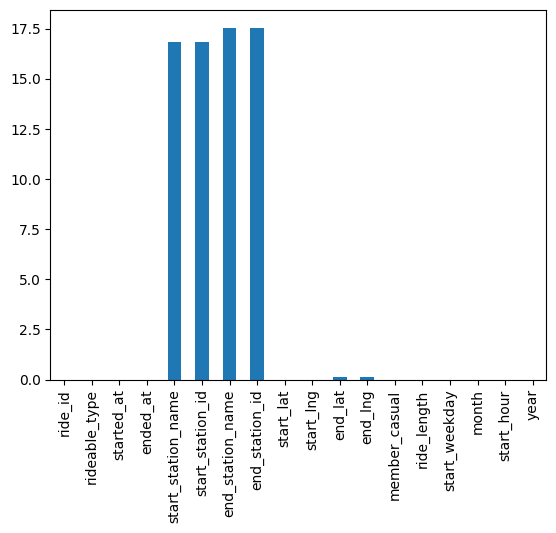

In [164]:
#Barplot to look at the percentage of missing values
missing_data = df.isnull().mean()*100
missing_data.plot(kind='bar')

**As we see, station_id and station_name have the same percentage of missing values**
**We could use heatmap tools to see how the missing values in station correlate to missing values in latitude and longitude. There is the  matrix tool too. We are going to use both**

<h4>Heatmap</h4>

<Axes: >

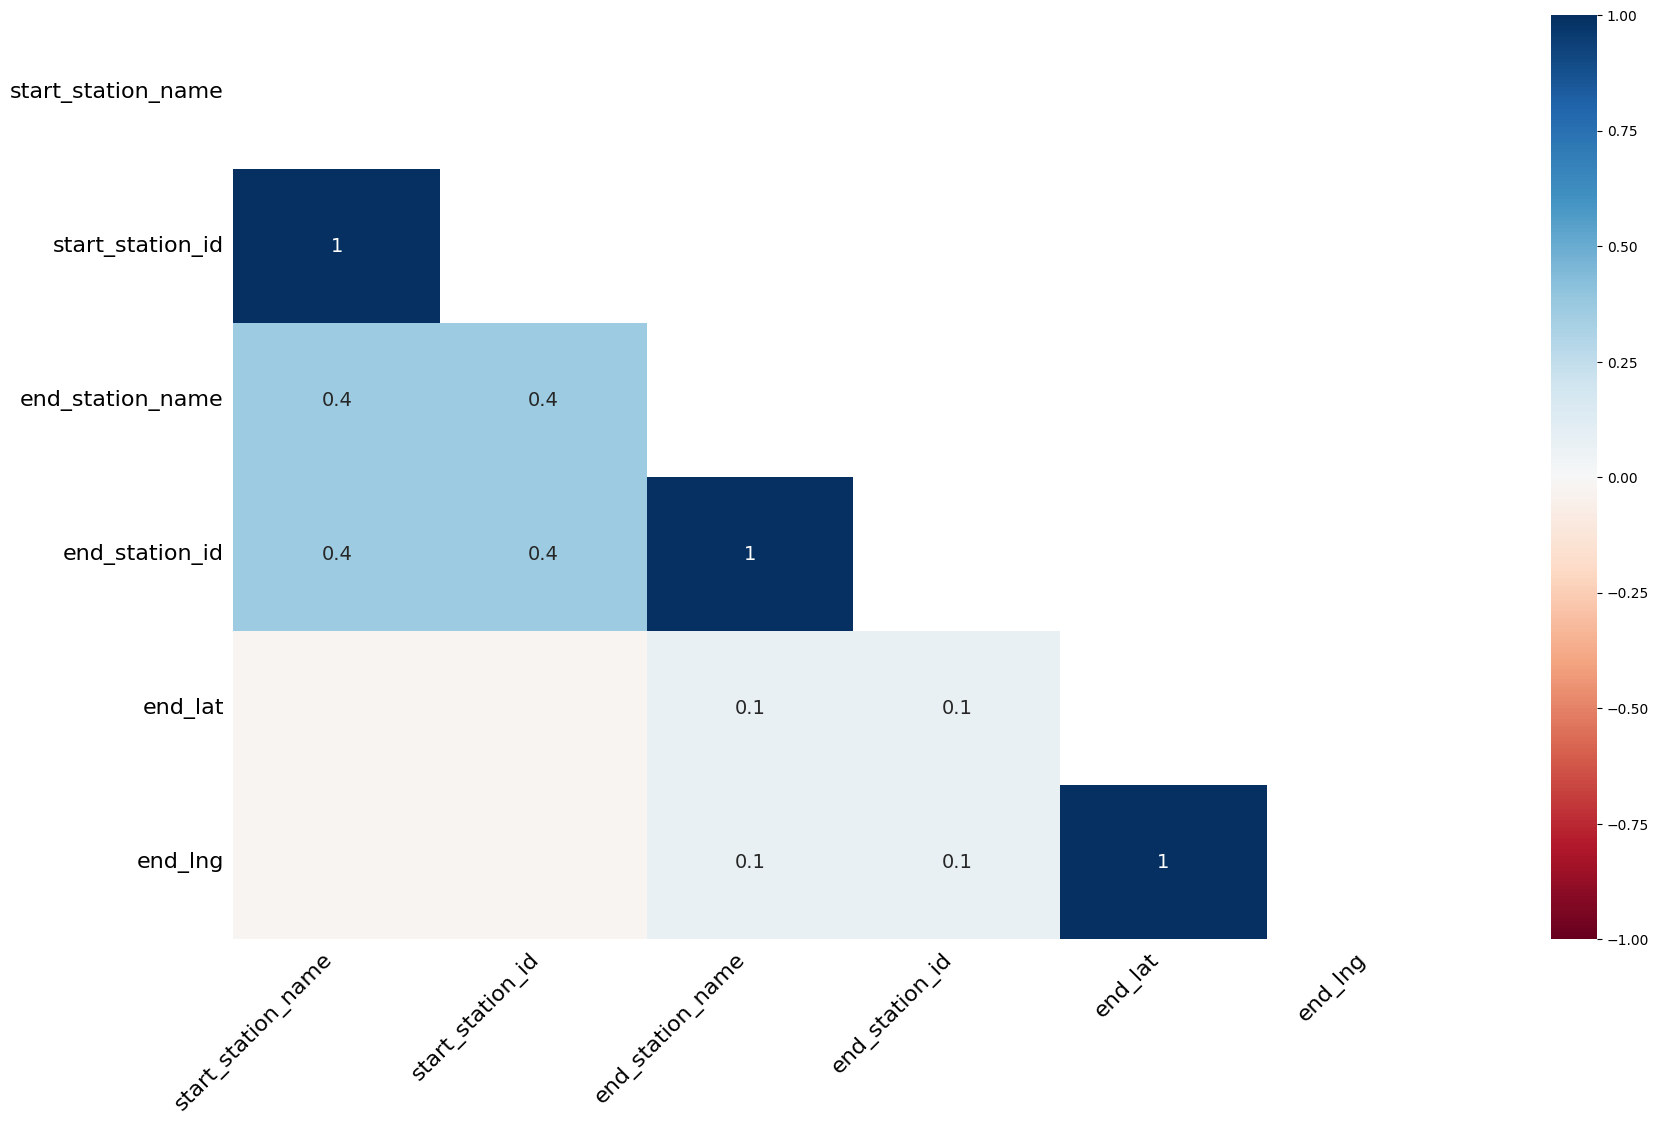

In [165]:
# plot missing data heatmap
msno.heatmap(df)

**Heatmap show a  same percentage of missing values between station_name and latitude-longitude and between station_id and latitude-longitude**

<h4>Matrix</h4>

<Axes: >

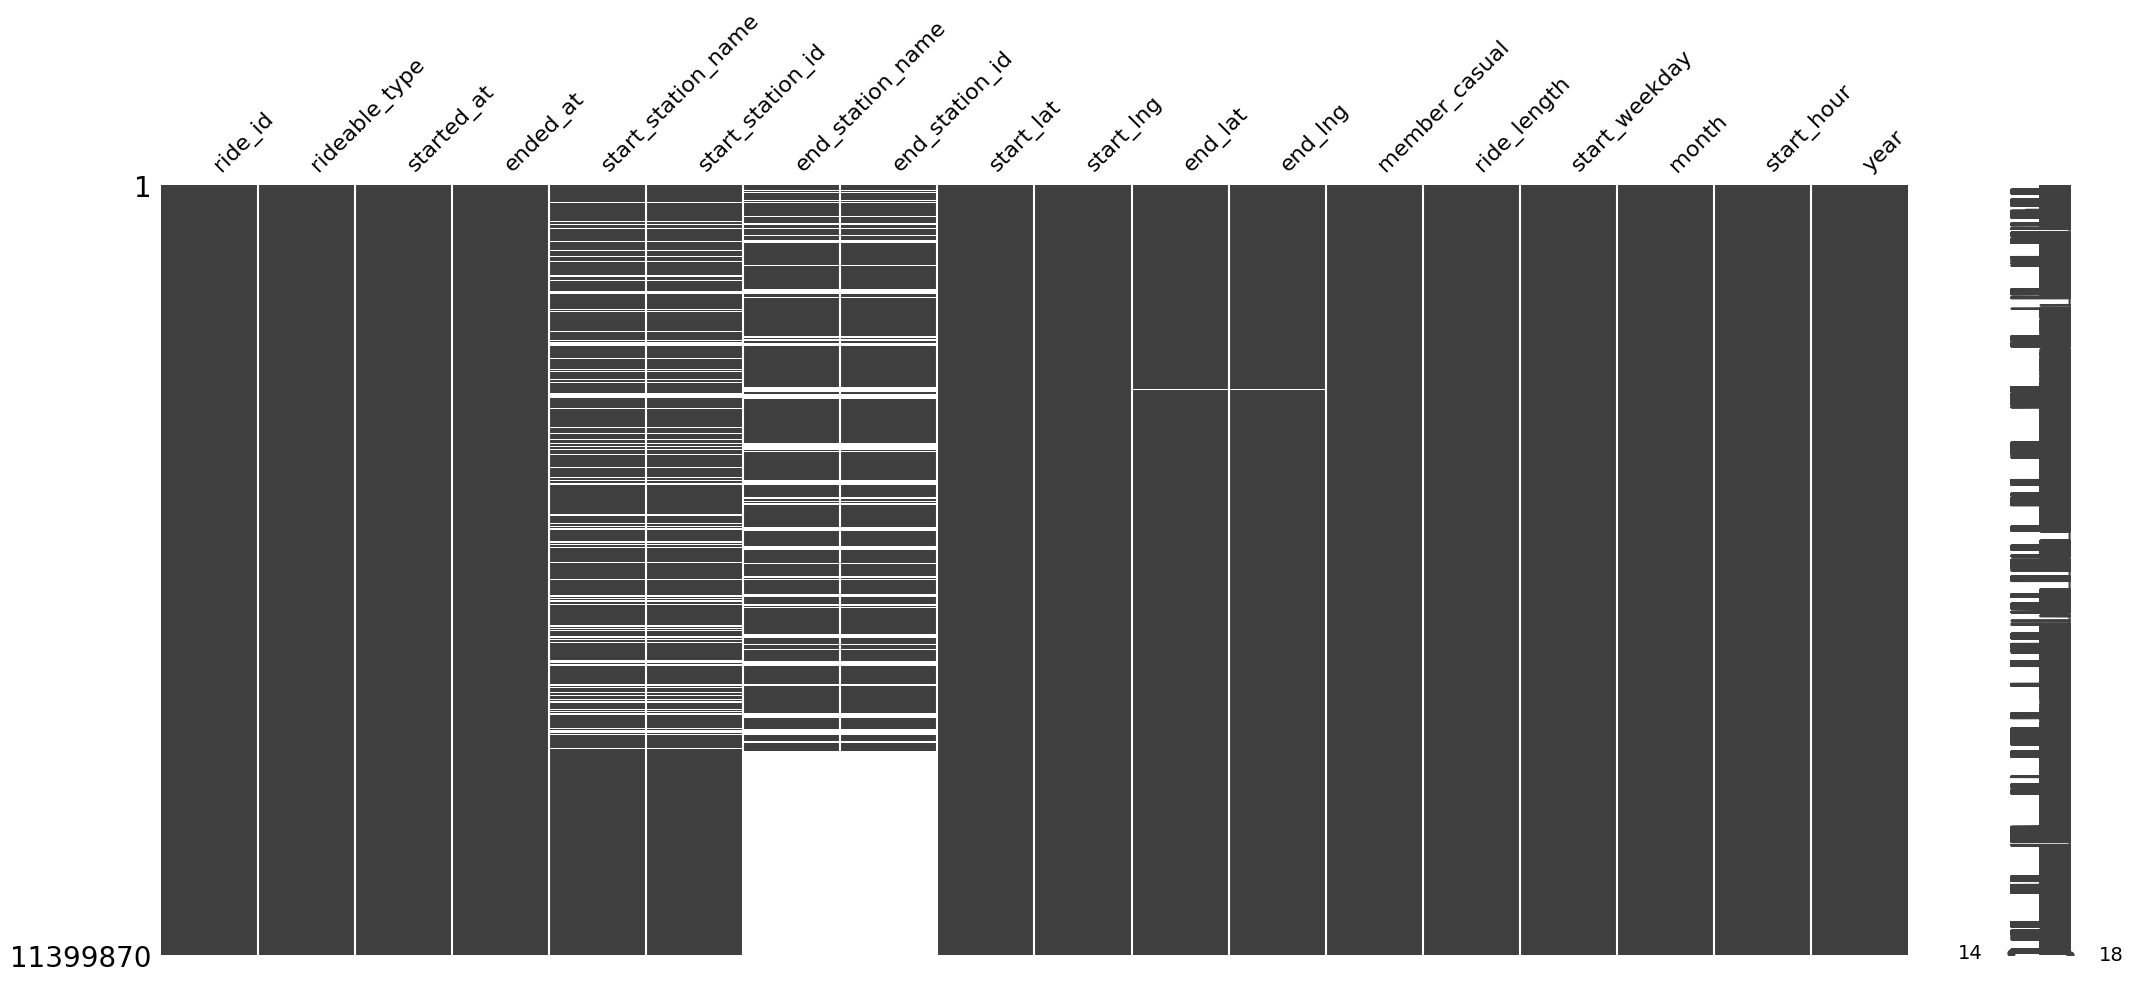

In [166]:
# or plot missing data matrix
msno.matrix(df)

**As we see, the missing rows of start_station_id and start_station_name correlate so we could get rid of one of them**

**Let's see which of them to use by examining if the two are really coherent.**

<h3>Evaluation of the coherence of sation_name and station_id</h3>

In [167]:
print('\nThe number of start_station_name: ', df['start_station_name'].nunique())
print('The number of start_station_id: ', df['start_station_id'].nunique())
print('The number of end_station_name: ', df['end_station_name'].nunique())
print('The number of end_station_id: ', df['end_station_id'].nunique())


The number of start_station_name:  1861
The number of start_station_id:  1801
The number of end_station_name:  1866
The number of end_station_id:  1807


In [168]:
# Let's create two dictionary:  key-name: d_id_name   and name- key: d_name_id and another dictionary which store an id with all names associated with it 
d_name_id = dict(zip(df['start_station_name'], df['start_station_id']))
d_id_name = dict(zip(df['start_station_id'], df['start_station_name']))
d_id_all_name = {i: [name]  for i, name in zip(df['start_station_id'], df['start_station_name'] )}
for name in d_name_id.keys():
    cle = d_name_id[name] 
    autre_name = d_id_name[cle]
    if name!=autre_name:
        d_id_all_name[cle].append(name)
        #print('Key:', cle, ', All names: ', d_id_all_name[cle])
        
#This code allow to print all the ids with their correponding values
#print('All ids with the differents names: ', d)

**To summarize the incoherence, we are going to create a dictionary that store the frequency  of number: the key correpond to  number of names and the value correpond to the number of ids that have the numbers**

In [169]:
from collections import defaultdict
# ThE dictionary store the the number of ids  which contains some specific length
freq_numbr_id = defaultdict(int)

# Parcourir les clés et les valeurs
for key, value in d_id_all_name.items():
    # Calculer la longueur de la valeur
    # Si la valeur n'est pas itérable (comme un int), on considère sa longueur comme 1
    length = len(value) if isinstance(value, (list, tuple, set, dict, str)) else 1
    freq_numbr_id[length] += 1

print(freq_numbr_id)

defaultdict(<class 'int'>, {1: 1688, 2: 112, 3: 2})


**As we see,  112 ids have two different names and 3ids have have three names**

<div style="background-color:#deffc2;">From the analyses, these  incoherence   come from the  presence of: 
<ul>
    <li>Additional name: (Temp)</li>
    <li>some ids that have  different values</li>
</ul>
We could correct the presence of additional name but how about the different values  that share the same ids <br><br>
What is the impact of this  to the latitude- longitude columns?There are two possible scenarios: 
<ul>
    <li>The two names with the same id have have the same latitude and longitude which conlude that the name is the wrong column</li>
    <li>The two names with the same id have have differents latitude and longitude which conlude that the id is the wrong column</li>
</ul>
So let's evaluate the pair latitude-longitude with  the corresponding ids and values to catch some incoherence  because a pair of latitude-longitude should have only name (or id) associated to it.
</div>

In [170]:
print('Length of ids: ' , df['start_station_id'].apply(lambda x: len(str(x))).value_counts())
#df[df['start_station_id'].apply(lambda x: True if  len(str(x))==35 else False)]['start_station_id']

Length of ids:  start_station_id
12    4617891
5     3756336
3     2474589
6      397772
7       62366
4       32562
13      17481
9       16911
10      15192
8        8440
14        300
22         18
35         10
20          1
11          1
Name: count, dtype: int64


**This shows  that  ids length are not uniform, this may be some of  the cause of the incoherences of station_ids and names**

<h3>Evaluation of the coherence of sation_id and latitude-longitude</h3>

In [171]:
print('The number of unique pair  latitude- longitude columns: ', df[['start_lat', 'start_lng']].drop_duplicates().shape[0])
print('The number of unique triple  latitude- longitude - station_id: ', df[['start_lat', 'start_lng', 'start_station_id']].drop_duplicates().shape[0])

The number of unique pair  latitude- longitude columns:  71
The number of unique triple  latitude- longitude - station_id:  3578


**As we see,  the number of rows of the pair  latitude- longitude  is  far  greater  than  the number of pair latitude-longitude which means there are more duplicate of the pair latitude-longitude with sifferent  station-id**

**For each pair latitude-longitude, how many station-id  correspond to that?** 

In [172]:
#d_latlng_id = dict(zip(df['start_lat'], df['start_station_id']))
#d_id_latlng = dict(zip(df['start_station_id'], df['start_lat']))

d_latlng_id = {f"{lat}_{lng}": i for lat, lng, i in zip(df['start_lat'], df['start_lng'], df['start_station_id'])}
d_id_latlng = {i: f"{lat}_{lng}" for lat, lng, i in zip(df['start_lat'], df['start_lng'], df['start_station_id'])}
d_latlong_all_id = {f"{lat}_{lng}": [i] for lat, lng, i in zip(df['start_lat'], df['start_lng'], df['start_station_id'])}

for i in d_id_latlng.keys():
    lat_lng = d_id_latlng[i]  
    autre_i = d_latlng_id[lat_lng] #autre_i est la valeur assocée au cle latlng dans le dictionnaire
    
    #initiate the dictionary
    #d_latlong_all_id[lat_lng] = [autre_i]
    if i!=autre_i:
        d_latlong_all_id[lat_lng].append(i)
        #print('Latitude_longitude:', lat_lng, ', valeurs associées: ',  d_latlong_all_id[lat_lng],'/')


**Frequency of each unique number of ids**

In [173]:
# Dictionnaire pour stocker le comptage
freq_lat_lon= defaultdict(int)

# Parcourir les clés et les valeurs
for key, value in d_latlong_all_id.items():
    # Calculer la longueur de la valeur
    # Si la valeur n'est pas itérable (comme un int), on considère sa longueur comme 1
    length = len(value) if isinstance(value, (list, tuple, set, dict, str)) else 1
    freq_lat_lon[length] += 1

print(freq_lat_lon)

defaultdict(<class 'int'>, {40: 1, 43: 2, 58: 3, 67: 1, 13: 3, 70: 2, 45: 1, 9: 3, 8: 1, 92: 1, 71: 2, 75: 1, 31: 1, 14: 1, 22: 2, 41: 3, 48: 1, 56: 1, 47: 1, 77: 1, 66: 1, 44: 1, 62: 1, 32: 1, 20: 1, 51: 1, 24: 1, 33: 2, 1: 23, 2: 4, 15: 1, 30: 1, 16: 1})


**No pairs of latitude longitude have unique ids associated with it**

<h3>Evaluation of the coherence of sation_name and latitude- longitude</h3>

In [174]:
print('The number of unique pair  latitude- longitude columns: ', df[['start_lat', 'start_lng']].drop_duplicates().shape[0])
print('The number of unique triple  latitude- longitude - station_name: ', df[['start_lat', 'start_lng', 'start_station_name']].drop_duplicates().shape[0])

The number of unique pair  latitude- longitude columns:  71
The number of unique triple  latitude- longitude - station_name:  3560


In [175]:
d_latlng_name = {f"{lat}_{lng}": name for lat, lng, name in zip(df['start_lat'], df['start_lng'], df['start_station_name'])}
d_name_latlng = {name: f"{lat}_{lng}" for lat, lng, name in zip(df['start_lat'], df['start_lng'], df['start_station_name'])}
d_latlong_all_name = {f"{lat}_{lng}": [name] for lat, lng, name in zip(df['start_lat'], df['start_lng'], df['start_station_name'])}

for name in d_name_latlng.keys():
    lat_lng = d_name_latlng[name]  
    autre_name = d_latlng_name[lat_lng] #autre_name est la valeur assocée au cle latlng dans le dictionnaire
    
    #initiate the dictionary
    #d_latlong_all_id[lat_lng] = [autre_i]
    if name!=autre_name:
        d_latlong_all_name[lat_lng].append(name)
        #print('Latitude_longitude:', lat_lng, ', valeurs associées: ',  d_latlong_all_name[lat_lng],'/')

In [176]:
# Dictionnaire pour stocker le comptage
df_latlng_name = defaultdict(int)

# Parcourir les clés et les valeurs
for key, value in d_latlong_all_name.items():
    # Calculer la longueur de la valeur
    # Si la valeur n'est pas itérable (comme un int), on considère sa longueur comme 1
    length = len(value) if isinstance(value, (list, tuple, set, dict, str)) else 1
    df_latlng_name[length] += 1

print(df_latlng_name)

defaultdict(<class 'int'>, {39: 1, 43: 2, 56: 1, 67: 1, 13: 2, 71: 1, 70: 1, 42: 2, 9: 1, 60: 2, 8: 1, 96: 1, 73: 1, 75: 1, 28: 1, 14: 2, 23: 2, 59: 1, 51: 1, 45: 1, 46: 1, 80: 1, 64: 1, 61: 1, 49: 1, 57: 2, 32: 1, 72: 1, 12: 1, 24: 1, 41: 1, 1: 24, 10: 1, 2: 3, 17: 2, 31: 1, 22: 1, 33: 1})


**No pairs of latitude longitude have unique names associated with it**

<div style="background-color:#deffc2;"><h4>Conclusion</h4>
    From all these analysis we have seen that there are some incoherences: 
    <ul>
    <li>between station_ids and station_name</li>
    <li>between the pair latitude-longitude and station_is</li>
    <li>between the pair latitude-longitude and station_name</li>  
    </ul>

We are going to keep the station_names instead of the station-ids
</div>

In [177]:
df = df.drop(columns = ['start_station_id', 'end_station_id'])

**Now let's deal with the missing values**

<h3>Impute missing values</h3>

<h4>End_lat and end_lng</h4>

For this we are going to get rid of the null rows, because we don't know their corresponding values 

In [178]:
df = df.dropna(subset=['end_lat', 'end_lng'], axis=0)

<h4>Start_station_id and end_station_id</h4>

We couldn't impute the from the station_ids and there are incoherence in the pair latitude-longitude and the station_names so it's better to impute them with the word 'Unknown'

In [179]:
df['start_station_name'].fillna('Unknown', inplace=True)
df['end_station_name'].fillna('Unknown', inplace=True)

<h3>Convert station_name data type to string</h3>

In [180]:
df['start_station_name']  = df['start_station_name'].astype('string')
df['end_station_name']  = df['end_station_name'].astype('string')

<h2>Processing rideable_type columns</h2>

In [181]:
df = process_rideable_type(df)

Number of missing rows:  0
Number of unique_values:  ['electric_bike' 'classic_bike' 'docked_bike' 'electric_scooter']
Type of rideable_type is:  string


<div style="background-color:#deffc2;"><h4>Summary</h4>
From the previous steps, the data have already been properly formatted, as we see in the results of the  following code.
During the data cleaning process, all of the columns were already processed and we even create some new features with the started_at column. However, 6 columns presented some anomalies, incoherences related to the station_id, name and the latitude- longitude columns, then because station_id and station_name are quite the same, the staion_id column has been deleted.
</div>

**Let's chech  now the  missing values and  the types of data**

<Axes: >

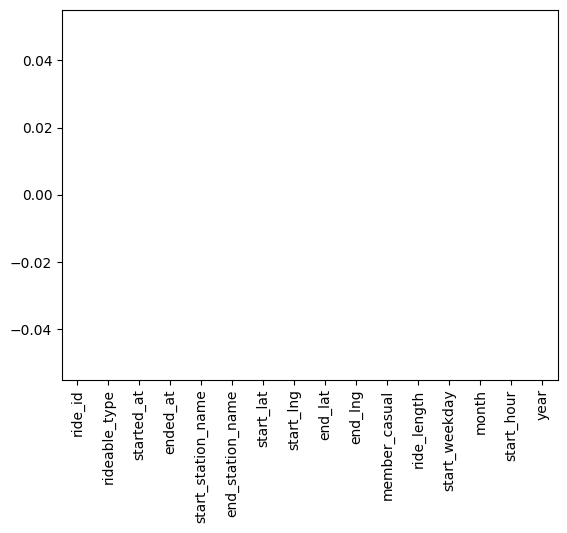

In [182]:
#Barplot to look at the percentage of missing values
missing_data = df.isnull().mean()*100
missing_data.plot(kind='bar')

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11385819 entries, 0 to 11402072
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             string        
 1   rideable_type       string        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  string        
 5   end_station_name    string        
 6   start_lat           float16       
 7   start_lng           float16       
 8   end_lat             float16       
 9   end_lng             float16       
 10  member_casual       string        
 11  ride_length         float64       
 12  start_weekday       int32         
 13  month               int32         
 14  start_hour          int32         
 15  year                int32         
dtypes: datetime64[ns](2), float16(4), float64(1), int32(4), string(5)
memory usage: 1.0 GB


<h1 style="color:blue;">ANALYZE</h1>
<div style="background-color:#fcffc2; padding: 20px;">
    The data analysis's goal is to look for trends, insights  in the data to better answer the business task:  How do annual members and casual riders use Cyclistic bikes differently?

   

**Before making the analysis, let's look at the distribution of each user.**

([<matplotlib.patches.Wedge at 0x7f24af89ee60>,
 [Text(-0.4515396635474814, 1.0030513108726928, 'Member'),
  Text(0.45153966354748126, -1.0030513108726928, 'Casual')],
 [Text(-0.24629436193498982, 0.5471188968396506, '63.5%'),
  Text(0.24629436193498974, -0.5471188968396506, '36.5%')])

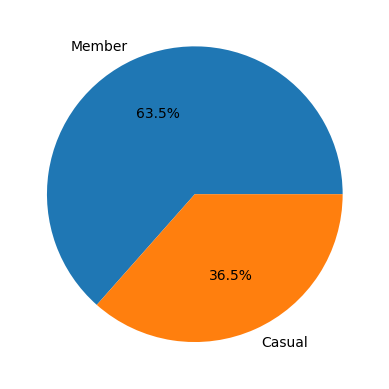

In [184]:
percentage_member_casual = list((df[df['member_casual']=='member'].shape[0]/df.shape[0], df[df['member_casual']=='casual'].shape[0]/df.shape[0]))
labels=['Member' , 'Casual']
fig, ax = plt.subplots()
ax.pie(percentage_member_casual, labels=labels,  autopct='%1.1f%%')

<div style="background-color:#deffc2;"><h4>Conclusion: </h4>
    From this, we see that the percentage is disproportionate because the Member hold a big part of the dataset about 63%, this could be explained that most of the users are member witnessing the popularity of the membership. 
    <br>
    However, in his dataset  information about the user has been removed  preventing us to know how many times one user repeat in the rows.
    <br><br>
    So to avoid wrong deduction in the analysis, when making analysis using rows, we would have to make some normalization.
</div>

<h2>Number of users by rideable type</h2>
Values: ride_id

In [185]:
member_size = df[df['member_casual']=='member'].shape[0]
casual_size = df[df['member_casual']=='casual'].shape[0]
nb_usr_by_rideable_type = pd.pivot_table(df, values='ride_id', index=['member_casual'], columns = ['rideable_type'], aggfunc="count")
nb_usr_by_rideable_type .loc['member', :] = (nb_usr_by_rideable_type .loc['member', :]/member_size)*100
nb_usr_by_rideable_type .loc['casual', :] = (nb_usr_by_rideable_type .loc['casual', :]/casual_size)*100
nb_usr_by_rideable_type 

rideable_type,classic_bike,docked_bike,electric_bike,electric_scooter
member_casual,,,,
casual,43.968524,1.82995,52.153036,2.048490
member,48.710760,NaN,50.471047,0.818193


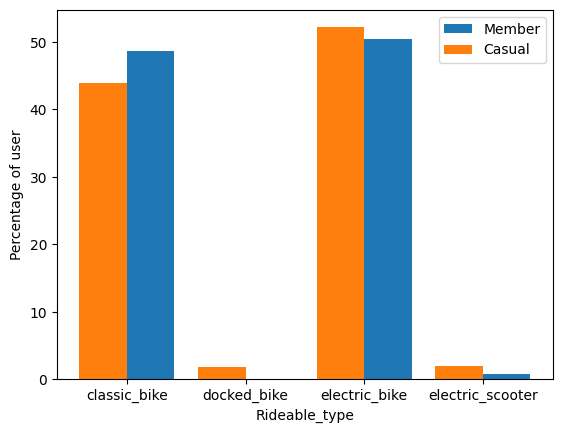

In [186]:
x = np.arange(4)
width = 0.4
plt.bar(x+0.2, list(nb_usr_by_rideable_type.loc['member', :]), width)
plt.bar(x-0.2, list(nb_usr_by_rideable_type.loc['casual', :]), width)
plt.xticks(x, ['classic_bike', 'docked_bike', 'electric_bike', 'electric_scooter'])
plt.xlabel("Rideable_type")
plt.ylabel("Percentage of user")
plt.legend(['Member', 'Casual'])

<div style="background-color:#deffc2;">
<h3>Number of users by rideable_type </h3>
    <ul>
    <li>Member: The most  used  type by members are classic bike and electric bike. Only few people use electric scooter whereas docked bike is not used by members </li>
        <li>Casual: Like member user, the most used type is classic bike and electric bike. Then only less people  docked bile and electric bike.   </li>
    </ul>
We could say that the difference is not so big except for the use of docked bike by casual user 
</div>

<h2>Pivot table: the average ride_length for members and casual riders</h2>

In [187]:
#Let's make a pivot table: the average ride_length for members and casual riders. 
pd.pivot_table(df, values='ride_length', index=['member_casual'], aggfunc="mean")

,ride_length
member_casual,
casual,1257.224417
member,731.212468


(array([2.44960e+05, 6.05341e+05, 9.34222e+05, 9.11641e+05, 7.86124e+05,
        6.56923e+05, 5.40384e+05, 4.35951e+05, 3.51946e+05, 2.85574e+05,
        2.33061e+05, 1.91729e+05, 1.57942e+05, 1.31857e+05, 1.10729e+05,
        9.24210e+04, 7.75340e+04, 6.55900e+04, 5.63190e+04, 4.83310e+04,
        4.13500e+04, 3.56880e+04, 3.10770e+04, 2.73040e+04, 2.34520e+04,
        1.99330e+04, 1.66130e+04, 1.31600e+04, 1.04010e+04, 8.62400e+03,
        7.17600e+03, 6.14700e+03, 5.35500e+03, 4.75300e+03, 4.09700e+03,
        3.42000e+03, 3.06700e+03, 2.64300e+03, 2.44900e+03, 2.16900e+03,
        1.92500e+03, 1.75400e+03, 1.60200e+03, 1.46300e+03, 1.34800e+03,
        1.22300e+03, 1.11900e+03, 1.04600e+03, 1.00200e+03, 8.63000e+02,
        8.87000e+02, 7.54000e+02, 7.54000e+02, 6.47000e+02, 6.02000e+02,
        6.09000e+02, 5.74000e+02, 5.41000e+02, 5.40000e+02, 4.55000e+02,
        4.51000e+02, 4.64000e+02, 4.07000e+02, 4.09000e+02, 3.64000e+02,
        3.61000e+02, 3.54000e+02, 3.29000e+02, 2.92

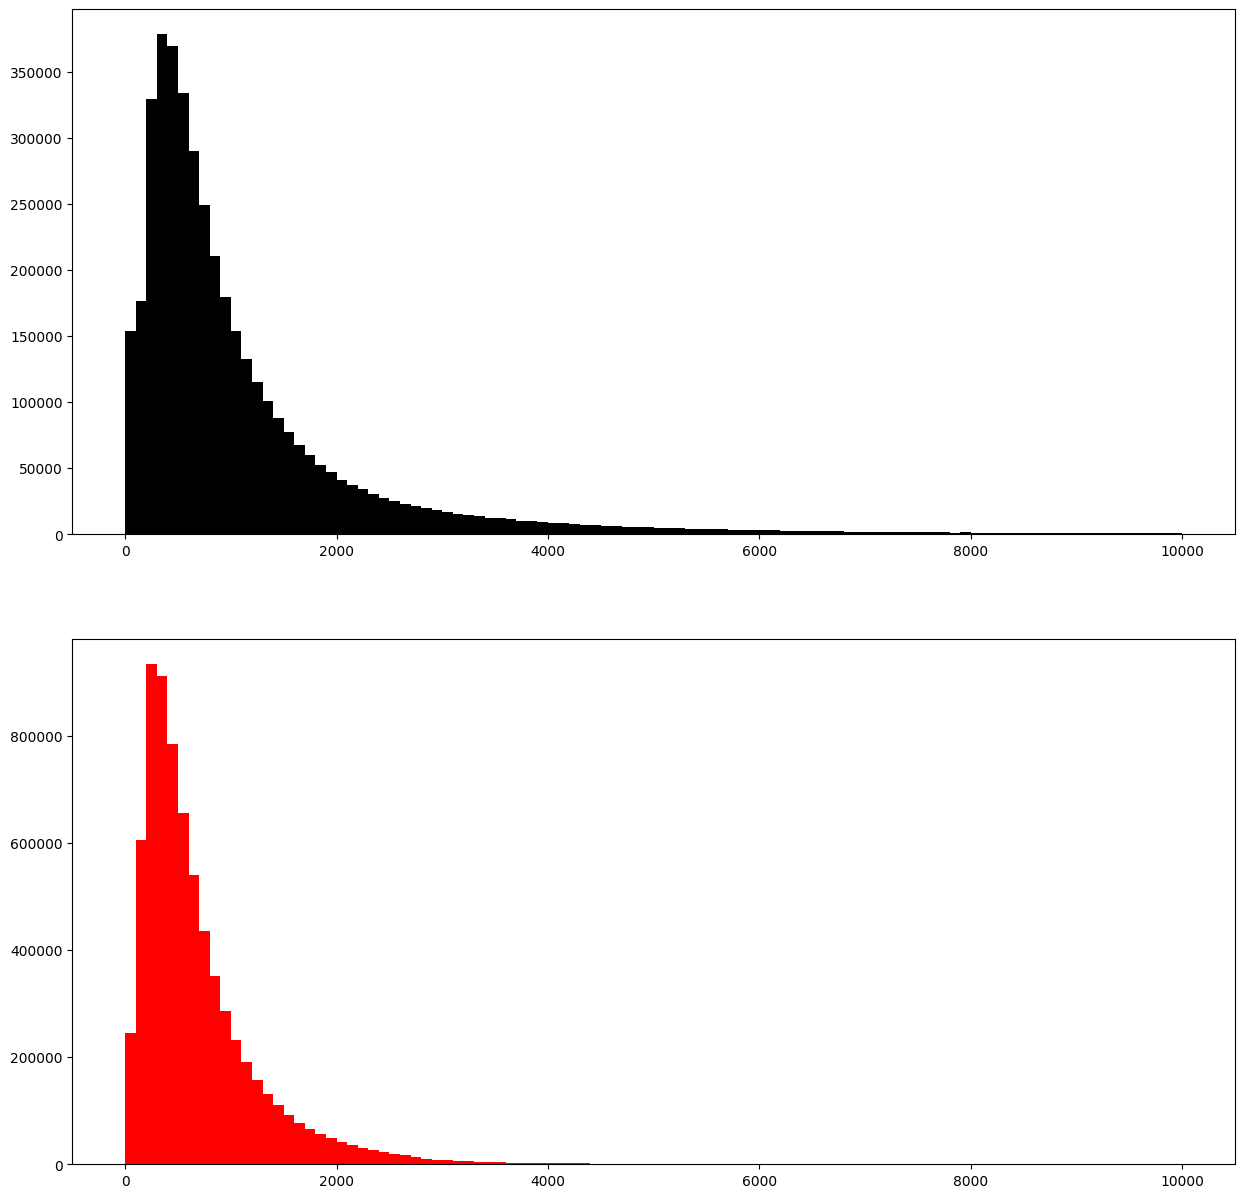

In [188]:
fig, axis = plt.subplots(2,1, figsize=(15,15))
axis[0].hist(df[df['member_casual']=='casual']['ride_length'],range=[0, 10000],bins=100, color='black')
axis[1].hist(df[df['member_casual']=='member']['ride_length'],range=[0, 10000],bins=100, color='red')

**Analyzing by ride_length alone don't seem to give a better analysis. Instead let's analyze the ride_length for each user by day_of_week.**

<h2>Pivot table: the average ride_length for users by day_of_week: </h2>
Columns =
day_of_week; Rows = member_casual; Values = Average of ride_length

In [189]:
ride_length_by_weekday = pd.pivot_table(df, values='ride_length', index=['member_casual'], columns=['start_weekday'],aggfunc="mean")
ride_length_by_weekday

start_weekday,0,1,2,3,4,5,6
member_casual,,,,,,,
casual,1228.523248,1104.597221,1094.656654,1094.694067,1215.863670,1424.18022,1457.40516
member,697.272125,700.983714,706.363187,701.259053,719.736103,812.26011,814.38698


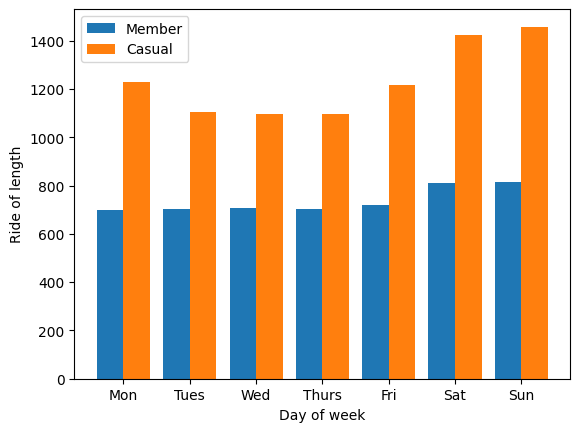

In [190]:
x = np.arange(7)
width = 0.4
plt.bar(x-0.2, list(ride_length_by_weekday.loc['member', :]), width)
plt.bar(x+0.2, list(ride_length_by_weekday.loc['casual', :]), width)
plt.xticks(x, ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri','Sat','Sun'])
plt.xlabel("Day of week")
plt.ylabel("Ride of length")
plt.legend(['Member', 'Casual'])

<div style="background-color:#deffc2;">
<h3>Average ride_length for users by day of week </h3>
    <ul>
    <li>Member: From  Monday to Friday, the members  users  show the same average length which can be explained by the fact that the members use the service to go to work so during these days, the use is only for work or important courses. However during day 5 and day 6, the rige length is a bit longer because maybe they use for some leisure, walking which take a litte bit longer.</li>
        <li>Casual: Comparing to member user, the casual user ride much longer. This may be explained by the fact that the use if for walking, leisure or distraction hence  the ride length. And just like with member user, the ride increase during day 5 and 6</li>
    </ul>
<h3>Trends: </h3>
    Compared to member user, the casual user always ride much longer. However during the weekend(day 5 and 6)  the ride length  increase for both users.
<h3> Insights to  answer  business questions:</h3>
    To attract casual member in the membership, the company could offer special services to promote longer ride length in the annual membership. 
</div>

<h2>Pivot table: the average ride_length for users by month</h2>
Columns = month; Rows = member_casual; Values = Average of ride_length

In [191]:
average_ride_length_by_month = pd.pivot_table(df, values='ride_length', index=['member_casual'], columns=['month'],aggfunc="mean")
average_ride_length_by_month

month,1,2,3,4,5,6,7,8,9,10,11,12
member_casual,,,,,,,,,,,,
casual,843.359070,1049.439567,1072.625842,1262.649822,1368.157704,1339.330293,1381.925899,1316.849407,1189.182877,1171.21411,965.294554,906.721987
member,645.811651,676.072768,643.741402,699.155194,765.740750,783.980962,793.458133,783.344068,734.974139,698.29830,653.769166,650.141864


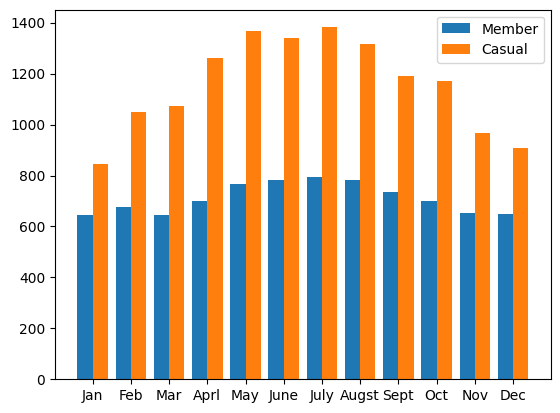

In [192]:
x = np.arange(12)
month = ['Jan', 'Feb', 'Mar', 'Aprl', 'May', 'June', 'July', 'Augst', 'Sept', 'Oct','Nov', 'Dec']
width = 0.4
plt.bar(x-0.2, list(average_ride_length_by_month.loc['member', :]), width)
plt.bar(x+0.2, list(average_ride_length_by_month.loc['casual', :]), width)
plt.xticks(x, month)
plt.legend(['Member', 'Casual'])

<div style="background-color:#deffc2;">
<h3>Average ride_length for users by month </h3>
    <ul>
    <li>Member: We can say that the ride length shows the same average during the year except from May to August which is a little bit longer because of the holidays so there are more actvities.</li>
        <li>Casual: Comparing to member user, the casual user ride much longer. This may be explained by the fact that the use if for walking, leisure activities  hence  the ride length. And just like with member user, the average ride length  is much longer  from April to August because of holidays </li>
    </ul>
</div>

<h2>Pivot table: the count of ride_id  by ride_length_category</h2>
Columns = month; Rows = member_casual; Values = Average of ride_length

**In this analysis, we are going to see the difference in  ride length by by ride_length_category  between users**

In [193]:
bins = [0, 600, 1200, 1800, 2400, 3000, 3600, np.inf]
names = ['<10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+']

# Create a new column for ride length category
df['ride_length_category'] = pd.cut(df['ride_length'], bins, labels=names)

In [194]:
count_of_ride_by_category = pd.pivot_table(df, values='ride_id', index=['member_casual'],columns =['ride_length_category'], aggfunc="count")
count_of_ride_by_category

ride_length_category,<10,10-20,20-30,30-40,40-50,50-60,60+
member_casual,,,,,,,
casual,1744427,1214299,508195,241546,135588,85662,230177
member,4145120,2034484,634907,239743,91998,30905,48768


In [195]:
count_of_ride_by_category.loc['member', :] = (count_of_ride_by_category.loc['member', :]/member_size)*100
count_of_ride_by_category.loc['casual', :] = (count_of_ride_by_category.loc['casual', :]/casual_size)*100
count_of_ride_by_category

<ipython-input-195-9158729d04d8>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '57.36455886270616' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-195-9158729d04d8>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '28.15534343353965' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-195-9158729d04d8>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '8.786515221234652' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-195-9158729d04d8>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3.317817442057591' has dtype incompatible with int64, pleas

ride_length_category,<10,10-20,20-30,30-40,40-50,50-60,60+
member_casual,,,,,,,
casual,41.934410,29.190624,12.216537,5.806542,3.259410,2.059235,5.533242
member,57.364559,28.155343,8.786515,3.317817,1.273166,0.427696,0.674903


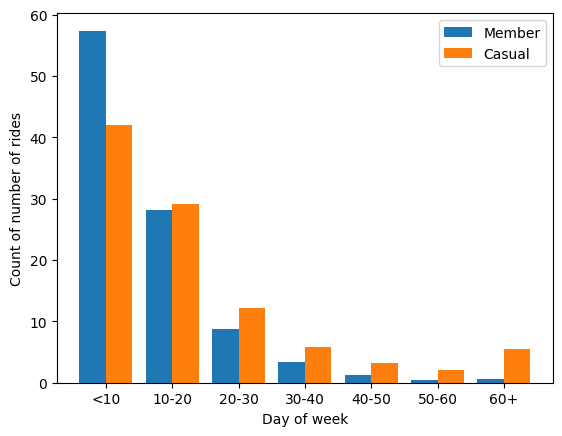

In [196]:
x = np.arange(7)
width = 0.4
plt.bar(x-0.2, list(count_of_ride_by_category.loc['member', :]), width)
plt.bar(x+0.2, list(count_of_ride_by_category.loc['casual', :]), width)
plt.xticks(x, ['<10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+'])
plt.xlabel("Day of week")
plt.ylabel("Count of number of rides") 
plt.legend(['Member', 'Casual'])

<div style="background-color:#deffc2;">
<h3>Number of rides  by category: </h3>
    <ul>
    <li>Member: From this bar plot, we can see that the members usually ride in small length : less than 10mn then between 10 to 20mn, which let suppose that this the ride is used for work. Then the more the length increase the less users there are which mean their ride is not for long walk but for  necessity. </li>
        <li>Casual: Like members users, they like small ride: first  length between 10 to 20m, then less than 10mn. Then the more increase in the length  the less users there are. However unlike before, there are more users in the category of 60mn+ than between 40-60mn which mean that these kind of users also like longer ride</li>
    </ul>
</div>

<h2> Pivot tables for the number of rides for users by day_of_week </h2>
Values: Count of ride_id

**Because there are big differences between the number of the two customers, we'll always try no normalize the values ie using the percentage**

In [197]:
nb_ride_by_day_of_week = pd.pivot_table(df, values='ride_id', index=['member_casual'], columns=['start_weekday'],aggfunc="count")
nb_ride_by_day_of_week

start_weekday,0,1,2,3,4,5,6
member_casual,,,,,,,
casual,479987,471651,512774,529868,621528,847144,696942
member,1000970,1121125,1176183,1141793,1039910,936716,809228


In [198]:
member_size = df[df['member_casual']=='member'].shape[0]
casual_size = df[df['member_casual']=='casual'].shape[0]
nb_ride_by_day_of_week.loc['member', :] = (nb_ride_by_day_of_week.loc['member', :]/member_size)*100
nb_ride_by_day_of_week.loc['casual', :] = (nb_ride_by_day_of_week.loc['casual', :]/casual_size)*100
nb_ride_by_day_of_week

<ipython-input-198-3b3e370cca7b>:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '13.852482554136666' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-198-3b3e370cca7b>:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '15.515314648297624' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-198-3b3e370cca7b>:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '16.27726554039794' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-198-3b3e370cca7b>:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '15.801340312831922' has dtype incompatible with int64, pl

start_weekday,0,1,2,3,4,5,6
member_casual,,,,,,,
casual,11.538443,11.338053,12.326612,12.737536,14.940958,20.364557,16.753840
member,13.852483,15.515315,16.277266,15.801340,14.391375,12.963268,11.198954


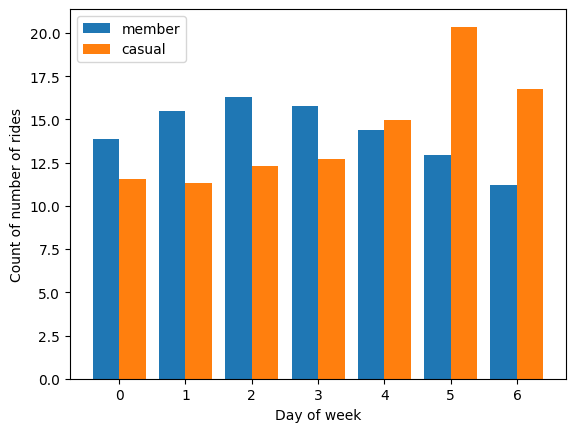

In [199]:
x = np.arange(7)
width = 0.4
plt.bar(x-0.2, list(nb_ride_by_day_of_week.loc['member', :]), width)
plt.bar(x+0.2, list(nb_ride_by_day_of_week.loc['casual', :]), width)
plt.xticks(x, x)
plt.xlabel("Day of week")
plt.ylabel("Count of number of rides")
plt.legend(['member', 'casual'])

<div style="background-color:#deffc2;">
<h3>Number of rides for users by day_of_week: </h3>
    <ul>
    <li>Member: Fom day 0 to day 4: Monday to Friday, the use of bike is the highest for members because as we have noticed, the members use bike mainly  to go to work. So during the weekend, most of them stay at home which explain why during the weekends the users are lower.</li>
        <li>Casual: Compared to member user, the casual user don't often ride from day 0 to day 4: Monday to Friday because maybe the use is mainly for leisure activities . However , from day 4 to day 6: Friday to Sunday,the use begin to rise because it's day off so they can enjoy it.</li>
    </ul>
<h3>Trends: </h3>
    From Monday to Friday, the member user ride the most and that use lower in the day off.
    In the contrary, casual user ride the lowest from Monday to Thursday, but from Friday when the day off is about to start, they ride the most especially on Saturday. 
<h4> Insights to  answer  business questions:</h4>
    To attract casual member in the membership, the company could offer special services to promote longer ride length in the annual membership. 
</div>

<h2>Pivot table: the number of  ride_id  by hour: </h2>
    Columns = hour; Rows = member_casual; Values = Average of ride_id

In [200]:
average_ride_by_hour = pd.pivot_table(df, values='ride_id', index=['member_casual'], columns=['start_hour'],aggfunc="count")
average_ride_by_hour

start_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
member_casual,,,,,,,,,,,,,,,,,,,,,
casual,71202,46748,28585,15751,12092,23237,58031,104987,144225,144765,...,293762,325111,369612,399046,342692,253072,183914,153779,134823,95625
member,67004,40406,23139,15403,17087,67260,204823,386340,488071,331336,...,398366,486989,660841,767313,604516,426607,298089,230096,169292,107463


In [201]:
average_ride_by_hour.loc['member', :] = (average_ride_by_hour.loc['member', :]/member_size)*100
average_ride_by_hour.loc['casual', :] = (average_ride_by_hour.loc['casual', :]/casual_size)*100
average_ride_by_hour

<ipython-input-201-d924a4e9ce94>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.9272722869390425' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-201-d924a4e9ce94>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5591810045080734' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-201-d924a4e9ce94>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.32022197850102235' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-201-d924a4e9ce94>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.2131630206513353' has dtype incompatible with int64, 

start_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
member_casual,,,,,,,,,,,,,,,,,,,,,
casual,1.711630,1.123779,0.687157,0.378639,0.290680,0.558596,1.395012,2.523790,3.467035,3.480017,...,7.061766,7.815367,8.885130,9.592696,8.237998,6.083617,4.421122,3.696705,3.241020,2.298736
member,0.927272,0.559181,0.320222,0.213163,0.236468,0.930815,2.834558,5.346582,6.754443,4.585378,...,5.513010,6.739469,9.145417,10.618890,8.365932,5.903839,4.125271,3.184312,2.342842,1.487187


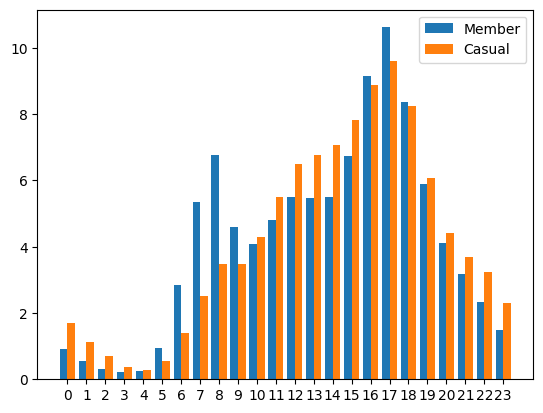

In [202]:
x = np.arange(24)
width = 0.4
plt.bar(x-0.2, list(average_ride_by_hour.loc['member', :]), width)
plt.bar(x+0.2, list(average_ride_by_hour.loc['casual', :]), width)
plt.xticks(x, x)
plt.legend(['Member', 'Casual'])

<div style="background-color:#deffc2;">
<h3>Number of  ride_id  by hour: </h3>
    <ul>
    <li>Member: Fom 0 to 4 AM: the use of bike is lowest  because it is still dark so people sleep. Then at 5 AM, the use of bike starts to rise because of the begining of activities. It increases until 8 o'clock which is the highest of this interval because of work, study, major activities  which start  at this time. Then the number of people using it is  average: not lowest but not the highest from 9AM to 2PM.  From 3 PM to 6 PM , the number of users is much higher than others with the highest peak of use at 5pm because people  go back home. Then it decreases until 4 PM. That means that the main reason people ride is for work because the trends correspond to that. 
        <li>Casual: Compared to member user, the casual user don't often ride from day 0 to day 4 am : Monday to Friday because of sleep. Then it starts to rise . The interval showing the highest use is from 12 to 19 pm . The highest use is at 5pm. This trend doesn't really correspond to ride for work but maybe for distraction</li>
    </ul>  

**To better see this trend , let's make another circular plot from the plotly library**

In [203]:
import plotly.express as px

def format_hour(h: int):
    h = str(h)
    if len(h) == 1: 
        h = '0'+h
    h = h+ ":00"
    return h
    
line_polar = df.groupby(['start_hour', 'member_casual'])['ride_id'].count().reset_index()
line_polar['start_hour'] = line_polar['start_hour'].apply(format_hour)

fig = px.line_polar(
    data_frame=line_polar,
    r = 'ride_id',
    theta='start_hour',
    color='member_casual',
    line_close=True,
    color_discrete_sequence=['crimson', 'royalblue'],
)
fig.show()


<h2>Pivot table: the number of  ride_id  by month:</h2>
Columns = month; Rows = member_casual; Values = Average of ride_id

In [204]:
number_ride_id_by_month = pd.pivot_table(df, values='ride_id', index=['member_casual'], columns=['month'],aggfunc="count")
number_ride_id_by_month

month,1,2,3,4,5,6,7,8,9,10,11,12
member_casual,,,,,,,,,,,,
casual,64241,89877,144260,278244,463830,600603,649725,627494,606715,392509,190902,51494
member,270413,323261,415401,562233,748664,827659,864325,897511,878762,759568,505843,172285


In [205]:
number_ride_id_by_month.loc['member', :] = (number_ride_id_by_month.loc['member', :]/member_size)*100
number_ride_id_by_month.loc['casual', :] = (number_ride_id_by_month.loc['casual', :]/casual_size)*100
number_ride_id_by_month

<ipython-input-205-f2468d9f39b2>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3.742261371381519' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-205-f2468d9f39b2>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4.473627943827261' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-205-f2468d9f39b2>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5.748758809425783' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-205-f2468d9f39b2>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '7.780775471652418' has dtype incompatible with int64, pleas

month,1,2,3,4,5,6,7,8,9,10,11,12
member_casual,,,,,,,,,,,,
casual,1.544294,2.160560,3.467877,6.688728,11.150044,14.437940,15.618787,15.084375,14.584867,9.435553,4.589107,1.237868
member,3.742261,4.473628,5.748759,7.780775,10.360805,11.454021,11.961444,12.420707,12.161239,10.511706,7.000391,2.384262


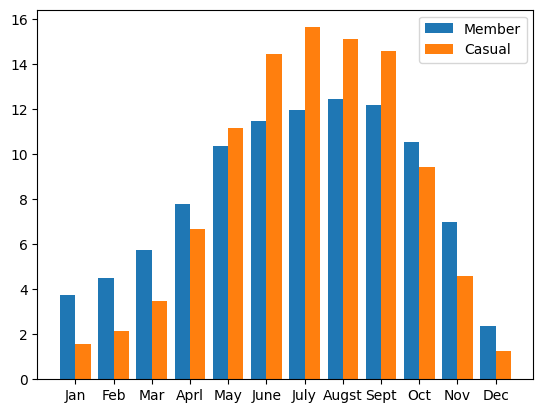

In [206]:
x = np.arange(12)
width = 0.4
plt.bar(x-0.2, list(number_ride_id_by_month.loc['member', :]), width)
plt.bar(x+0.2, list(number_ride_id_by_month.loc['casual', :]), width)
plt.xticks(x, month)
plt.legend(['Member', 'Casual'])

<div style="background-color:#deffc2;">
<h3>Number of rides for users by month: </h3>
    For the two types of users, the use of bike divide in two parts: the first part is from January to April then November to December  and the second part is from May to October.
    <ul>
    <li>Member: Fom  January to April then November to December, the use of bike is lower whereas from May to October the use is higher.Indeed  from June to September, these months are holidays  months so the use of bike is at highest for leisure activities. When the holidays are finished, people come back to their normal days: moving for work and study so there lower  ride. </li>
    <li>Casual: Compared to member user, the casual user don't often ride from January to April then November to December. But from May when the holidays are about to start, the casual users begin to ride too , the highest use is then from June to September as for the members users  because of a lot of leisure activities, then from October it begins to fall until the arrival of the holidays again. 
        </li>
    </ul>
</div>

<h2>Station</h2>

<h3>Start station</h3>

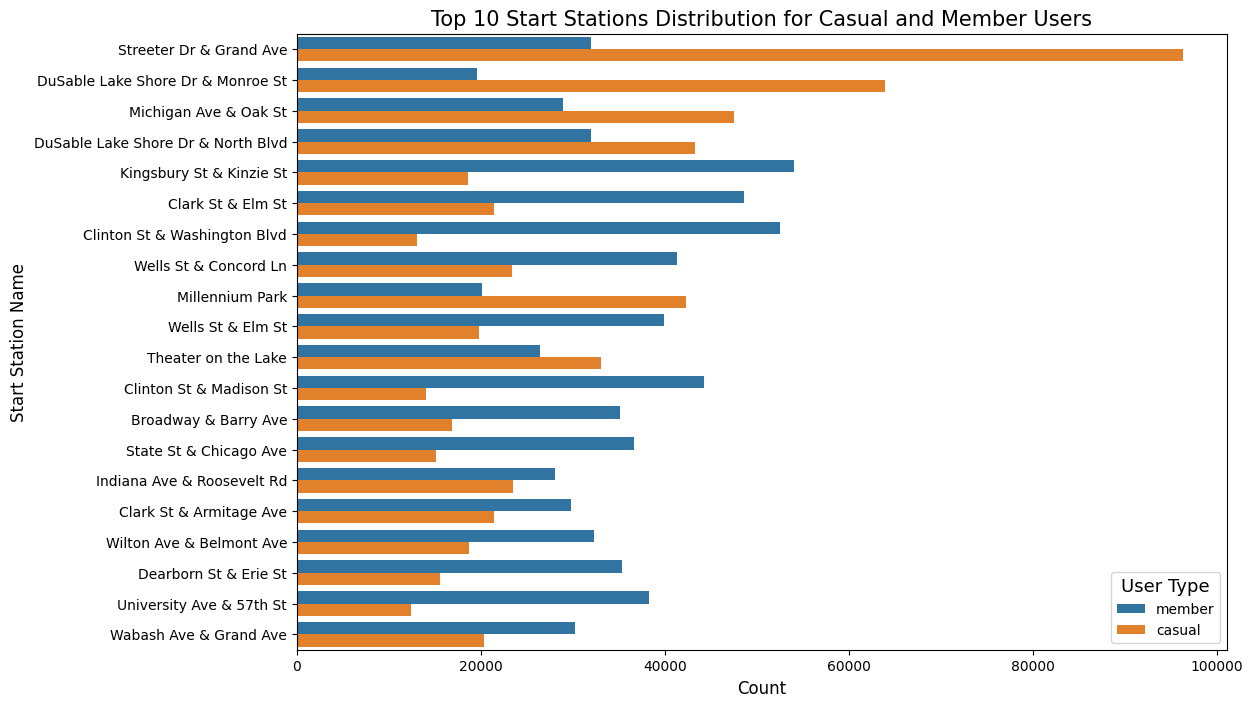

In [207]:
#We'll remove the value Unknown
filtered_df  = df[~df['start_station_name'].isin(['Other', 'Unknown'])] 
top_stations = filtered_df['start_station_name'].value_counts().head(20).index

# Filter the data to include only the top 10 start stations
top_stations_data = filtered_df[filtered_df['start_station_name'].isin(top_stations)]

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the countplot
sns.countplot(y='start_station_name', hue='member_casual', data=top_stations_data,  order=top_stations)

# Customize title and labels
plt.title('Top 10 Start Stations Distribution for Casual and Member Users', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Start Station Name', fontsize=12)

# Customize the legend
plt.legend(title='User Type', title_fontsize='13', loc='lower right')

# Show the plot
plt.show() 

<h3>End station</h3>

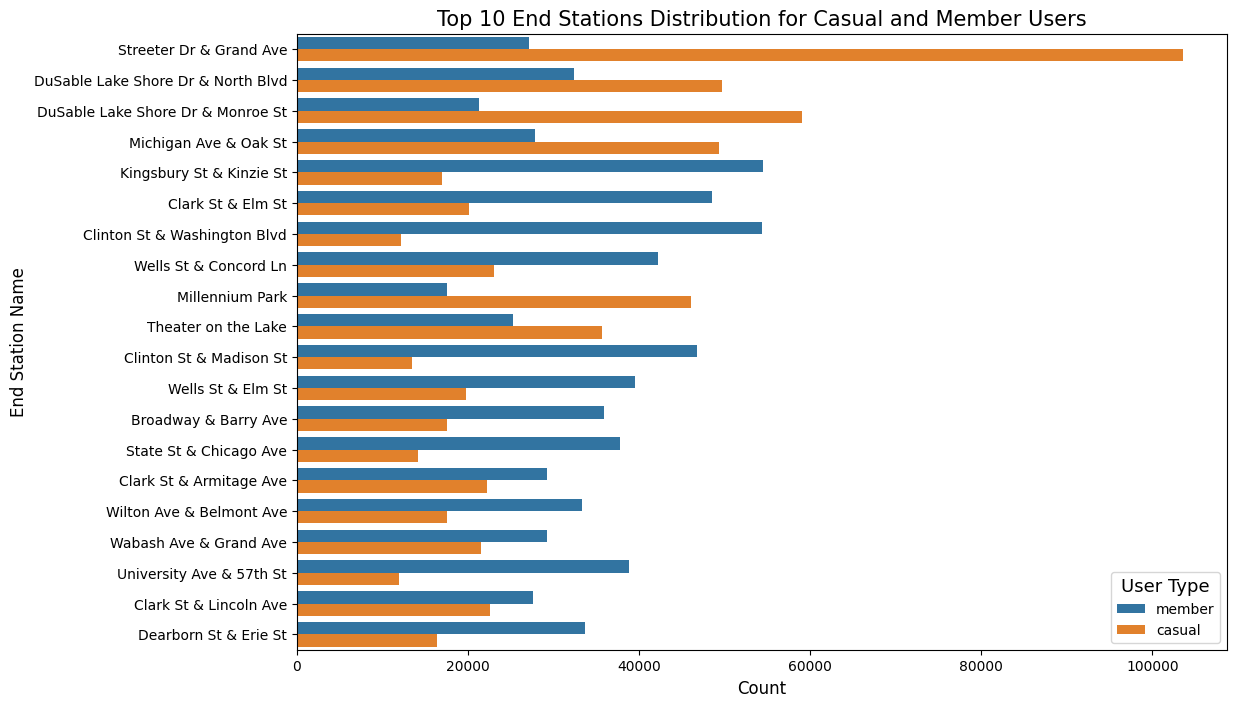

In [208]:
filtered_df  = df[~df['end_station_name'].isin(['Other', 'Unknown'])] 
top_stations = filtered_df['end_station_name'].value_counts().head(20).index

# Filter the data to include only the top 10 start stations
top_stations_data = filtered_df[filtered_df['end_station_name'].isin(top_stations)]

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the countplot
sns.countplot(y='end_station_name', hue='member_casual', data=top_stations_data,  order=top_stations)

# Customize title and labels
plt.title('Top 10 End Stations Distribution for Casual and Member Users', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('End Station Name', fontsize=12)

# Customize the legend
plt.legend(title='User Type', title_fontsize='13', loc='lower right')

# Show the plot
plt.show() 

<div style="background-color:#deffc2;">
<h3>Stations: </h3>
    The analysis is done for the most used stations. From that we see that  the two bar plots for start and end station_name show that there is a  distinction between station accustomed by members and casual users.</br>
    For casual, their preferred start, end stations names are  the four first names , plus Millenial Park. </br>
    However for members, they are more spread between stations 
</div>

In [209]:
#g = pd.pivot_table(top_stations_data, values='ride_id', index=['member_casual'], columns = ['start_station_name'], aggfunc="count")
#g.loc['member', :] = (g.loc['member', :]/member_size)*100
#g.loc['casual', :] = (g.loc['casual', :]/casual_size)*100
"""
h = g.T
i = h[h['casual']>h['member']][['casual']]
i['start_station_id']
j['start_station_id']
i = i.reset_index()
j = i.merge(top_stations_data, left_on='start_station_id', right_on='start_station_id')
"""

"\nh = g.T\ni = h[h['casual']>h['member']][['casual']]\ni['start_station_id']\nj['start_station_id']\ni = i.reset_index()\nj = i.merge(top_stations_data, left_on='start_station_id', right_on='start_station_id')\n"

<h1 style="color:blue;">SHARE</h1

<div style="background-color:#fcffc2; padding: 20px;">
<h3>Summary: </h3>
To increase the benefice  at the   Cyclistic which launches  a successful bike-share offering, the director  of marketing Lily Moreno believes that the key is to convert the casual users to members. Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, the team needs to beer understand how annual members and casual riders differ which is the business task. 
    
<h3>Results: </h3>
Casual users tend to ride longer than members throughout the week and month, especially on Saturdays and Sundays, as well as during the holidays (from April to August). The number of casual users peaks during these days off (from Friday to Sunday) and the holiday season, although it is lower than that of members on other days and months.

Casual users enjoy both short and long rides. They don't have a specific time preference for riding, but the number of users begins to increase from 5 AM. The highest peak is observed at 5 PM, after which it decreases. And from the analyses, they have 4 preferred stations that maybe local attraction.  This suggests that casual users primarily ride bikes for leisure and recreational purposes. </br>

Member users, on the other hand, don't ride as long as casual users, though the duration of their rides increases slightly on Saturdays, Sundays, and during holidays (from April to August). The number of member users is higher from Monday to Friday, but it is lower than that of casual users on weekends. However, during the holidays, the number of member users increases, much like casual users.

Members prefer shorter rides. In terms of time, the number of users is higher during two specific periods: 5 AM to 8 AM and 3 PM to 6 PM. Peaks occur at 8 AM and 5 PM, which coincide with rush hours. And finally, they are spread around all the stations.  All of that indicate that  members primarily use bikes for commuting purposes like work.  

<h1 style="color:blue;">ACT</h1

<div style="background-color:#fcffc2; padding: 20px;">
<h3>Recommandations: </h3>
From the results of the analysis about the busines  task, the recommandations are: 
<ul>
    <li>Target holidays and weekends  to   create limited-time promotional offers for annual memberships during these periods</li>
    <li>Target the prefered station of the casual,  the local attractions  users to provide exclusive benefits for members, such as discounted entry </li>
    <li>Host themed bike events or challenges on weekends or during holidays and  offer perk like discounts, or exclusive access to members.</li>
</ul>


<div style="background-color:#fcffc2; padding: 20px;">
<h3>Improvements: </h3>
To have better results for the analysis, some improvements have to be made like: 
<ul>
    <li>Adding additional features like profession that could help us in knowing more about the differents users</li>
    <li>Correct the incoherences in the station_ids, names , latitude and longitude</li>
    <li>Getting additional information about ids </li>
</ul>